<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/predict_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lấy dữ liệu bằng pd.read_csv , sử dụng sep để phân biệt cột

In [22]:
import pandas as pd
import numpy as np 
data = pd.read_csv('http://cs.uit.edu.vn/data2.txt', sep = ',' , names=['input size','time'] )
print(data.shape)
data.head()

(71115, 2)


,input size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


tạo thêm features từ 1 feature để tăng độ chính xác khi đánh giá 

In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

đồ thị bảng dữ liệu 

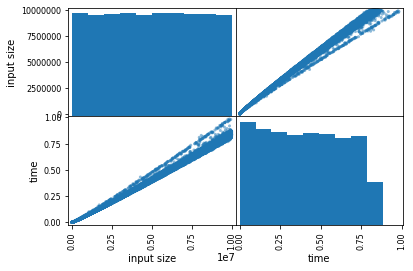

In [24]:
scatter_matrix(data)
pyplot.show()

In [0]:
from sklearn.model_selection import train_test_split

phân tách bảng để lấy các features cần cho dự đoán

phân chia dữ liệu train và valid với tỉ lệ 8/2 

reshape lại dữ liệu vì lúc này dữ liệu đang ở dạng array 1 chiều 

In [0]:
X=data['input size']
y=data['time']

In [0]:
#print (X.head , y.head)
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.20 , random_state=1)
X_train = X_train.values.reshape(-1,1)
X_valid = X_valid.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)

In [38]:
print (X_train.shape, y_train.shape)

(56892, 1) (56892, 1)


Khảo sát mô hình với 3 thuật toán hồi quy đơn giản nhất 

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

đánh giả, tìm ra mô hình tốt nhất bằng cách sử dụng sai số tuyệt đối: mean absolute error

In [39]:
models = []
models.append(('DT' , DecisionTreeRegressor( random_state = 1)))
models.append(('RF' , RandomForestRegressor( random_state = 1)))
models.append(('LR' , LinearRegression()))
result = []
names = []
for name , model in models:
  model.fit(X_train , y_train)
  val_pred = model.predict(X_valid)
  Test_result = mean_absolute_error(val_pred , y_valid)
  print (name , Test_result)

DT 0.009799554658390212


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF 0.008454977149932036
LR 0.00831551754510758


Linear regression is the best model

Predict new data

In [40]:
LR_model = LinearRegression()
LR_model.fit(X_train , y_train)
val_pred_1 = LR_model.predict(X_valid)
print (val_pred_1)
print (mean_absolute_error(val_pred_1 , y_valid))

[[0.35839721]
 [0.74078372]
 [0.78008414]
 ...
 [0.23839035]
 [0.44522958]
 [0.25019853]]
0.00831551754510758


test độ chính xác của mô hình bằng cách so sánh với giá trị thực

In [41]:
new_data_2 = {'input size':[5839301] }
data_convert_2=pd.DataFrame.from_dict(new_data_2) 
print (LR_model.predict(data_convert_2))
# real time = 0.460480

[[0.47783484]]
